# Graph Analysis of Text

Tasks such as machine translation, question answering, and instruction-following often require more complex,
semantic reasoning than applying traditional classification and clustering algorithms to text.

To model information about the relationships between the entities, phrases, and themes

Traditionally, phrases are encoded using text meaning representations
(TMRs). TMRs take the form of ('`subject`', '`predicate`', '`object`') triples (e.g.,
('FDA', 'recalls', 'pacemakers')), to which first-order logic or lambda calculus
can be applied to achieve semantic reasoning.

Unfortunately, the construction of TMRs often requires substantial prior knowledge.
For instance, we need to know not only that the acronym “FDA” is an actor, but that
“recalling” is an action that can be taken by some entities against others.

For most language-aware data products, building a sufficient number of TMRs to support
meaningful semantic analysis will not be practical.

However, if we shift our thinking slightly, we might also think of this subjectpredicate-
object as a graph, where the predicates are edges between subject and object
nodes.

## Graph Computation and Analysis

One of the primary exercises in graph analytics is to determine what exactly the
nodes and edges should be. Generally, nodes represent the real-world entities we
would like to analyze, and edges represent the different types (and magnitudes) of
relationships that exist between nodes.
Once a schema is determined, graph extraction is fairly straightforward.

In [1]:
import networkx as nx
from nltk.corpus import wordnet as wn

def graph_synsets(terms, pos=wn.NOUN, depth=2):
    """
    Create a networkx graph of the given terms to the given depth.
    """
    G = nx.Graph(
        name="WordNet Synsets Graph for {}".format(", ".join(terms)), depth=depth,
    )
    
    
    def add_term_links(G, term, current_depth):
        for syn in wn.synsets(term):
            for name in syn.lemma_names():
                G.add_edge(term, name)
                if current_depth < depth:
                    add_term_links(G, name, current_depth+1)

    for term in terms:
        add_term_links(G, term, 0)
    return G

In [2]:
G = graph_synsets(["trinket"])
print(nx.info(G))

Name: WordNet Synsets Graph for trinket
Type: Graph
Number of nodes: 25
Number of edges: 49
Average degree:   3.9200


In [3]:
import matplotlib.pyplot as plt

def draw_text_graph(G):
    pos = nx.spring_layout(G, scale=18)
    nx.draw_networkx_nodes(
        G, pos, node_color="white", linewidths=0, node_size=500
    )
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, edge_color='lightgrey')
    plt.tick_params(
    axis='both', # changes apply to both the x- and y-axis
    which='both', # both major and minor ticks are affected
    bottom='off', # turn off ticks along bottom edge
    left='off', # turn off ticks along left edge
    labelbottom='off', # turn off labels along bottom edge
    labelleft='off') # turn off labels along left edge
    plt.show()

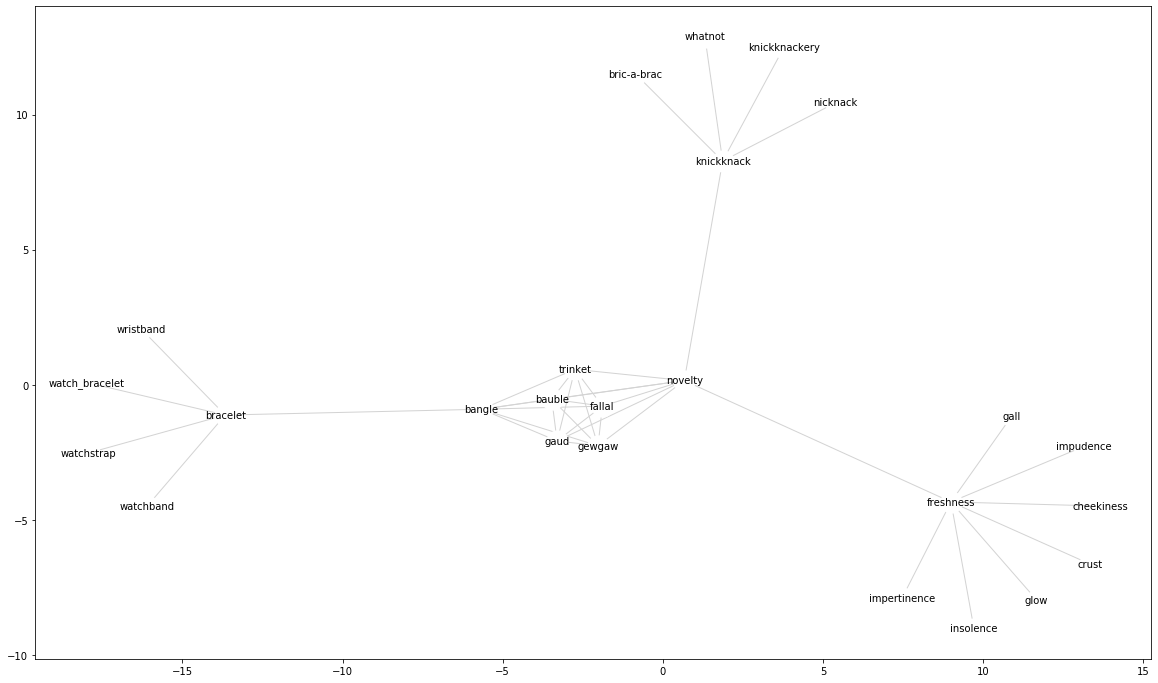

In [5]:
fig = plt.figure(figsize=(20, 12))
draw_text_graph(G)

## Extracting Graphs from Text

One major challenge presents itself when the core dataset is text: where does the
graph come from? The answer will usually depend on the problem domain, and
generally speaking, the search for structural elements in semistructured or unstructured
data will be guided by context-specific analytical questions

![Graph-Analysis](../meta/Graph-Analysis-on-Text.png)

In this workflow, we first use a problem statement to determine entities and their
relationships. Using this schema, we can create a graph extraction methodology that
uses the corpus, metadata, documents in the corpus, and phrases or tokens in the corpus’
documents to extract and link our data. The extraction method is a batch process
that can run on the corpus and generate a graph that can be written to disk or stored
in memory for analytical processing.

The graph analysis phase conducts computations on the extracted graph such as clustering,
structural analysis, filtering, or querying and returns a new graph that is used
as output for applications. Inspecting the results of the analytical process allows us to
iterate on our method and schema, extracting or collapsing groups of nodes or edges
as needed to ensure accurate, usable results.